## NATURAL LANGUAGE PROCESSING, A NAIVE BAYES APPROCH

#### ASSIGNMENT

The assignment consists in the development, in NLTK, OpenNLP, SketchEngine or GATE/Annie a Naïve Bayes Classifier able to detect a single class in one of the corpora available as attachments to the chosen package, by distinguishing ENGLISH against NON-ENGLISH. In particular the classifier has to be:

1. Trained on a split subset of the chosen corpus, by either using an existing partition between sample documents for training and for test or by using a random splitter among the available ones;

2. Devised as a pipeline of any chosen format, including the simplest version based on word2vec on a list of words obtained by one of the available lexical resources.

The test of the classifier shall give out the measures of accuracy, precision, recall on the obtained confusion matrix and WILL NOT BE EVALUATED ON THE LEVEL OF THE PERFORMANCES. In other terms, when the confusion is produced, then the value of the assignment will be good, independently of the percentage of false positive and negative results.

Deliver a short set of comments on the experience (do not deliver the entire code, but link it on a public repository like GitHub or the GATE Repo). Discuss: size of the corpus, size of the split training and test sets, performance indicators employed and their nature, employability of the classifier as a Probabilistic Language Model

How am I going to do it? There are multiple options on how solve this assignment, I choose 2 of them:
1. First half part I'm doing a Bayesian classifier by single tokens, using 4 differente languages. The english language will be my discriminant.
2. Second half I do the same but instead of using pure tokens, I use the senteces and the tokens inside the senteces, utilizing an occurrences vector of the most common words (of every language mixed toghether) for every sentences. I'll explain better in details later on.

First of all, let's import all the libraries I need:
1. nltk library, to use the function 'download' to download all the corpus we will utilize.
2. corpus 'europarl.raw'
3. tokenization functions
4. set of stopwords
5. to use the punctuaction set as stopwords
6. Porter stemming for the stemming
7. Word Net Lemmatizer for the lemmatization
8. function to have the Frequency Distribuition
9. Pandas to operate on dataframe
10. random for shuffling the dataframe
11. sklearn for train-test splitting
12. numpy to load external .txt text
13. Precision Metrics (sklearn)
14. Recall Metrics (sklearn)
14. F1_score Metrics (sklearn)
15. Accuracy Metrics (sklearn)
16. confusion matrix module
17. SnowBall Stemmer 
18. Naive Bayes Classifier by nltk

In [1]:
import nltk
from nltk.corpus import europarl_raw
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
import string
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk import FreqDist
import pandas as pd
import random
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import precision_score as PR
from sklearn.metrics import recall_score as RC
from sklearn.metrics import accuracy_score as ACC
from sklearn.metrics import ConfusionMatrixDisplay
from nltk.stem.snowball import SnowballStemmer
from nltk import NaiveBayesClassifier
from sklearn.metrics import f1_score as F1


I've to download the various corpora from 'europarl_raw' package and the set of stopwords I need.

In [2]:
nltk.download('europarl_raw')
nltk.download("stopwords")


[nltk_data] Downloading package europarl_raw to
[nltk_data]     C:\Users\39331\AppData\Roaming\nltk_data...
[nltk_data]   Package europarl_raw is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\39331\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

I create the 4 different text with 4 different languages:
1. ENGLISH
2. ITALIAN
3. DUTCH
4. FINNISH

In [3]:
testoING = ' '.join(europarl_raw.english.words())
testoITA= ' '.join(europarl_raw.italian.words())
testoDUTCH= ' '.join(europarl_raw.dutch.words())
testoFINNISH= ' '.join(europarl_raw.finnish.words())

I set all 4 text to lower case.

In [4]:
testoING = testoING.lower()
testoITA = testoITA.lower()
testoDUTCH = testoDUTCH.lower()
testoFINNISH = testoFINNISH.lower()

### WORD BASED CLASSIFIER

I use the nltk's function 'word_tokenize' to make a tokenization of the words.

In [5]:
t_wordITA = word_tokenize(testoITA)
t_wordING = word_tokenize(testoING)
t_wordDUTCH = word_tokenize(testoDUTCH)
t_wordFINNISH = word_tokenize(testoFINNISH)

I create a set of stopwords plus punctuation, one for each language.

In [6]:

ST = set(stopwords.words("english")+list(string.punctuation))
ST_ita = set(stopwords.words("italian")+list(string.punctuation))
ST_finnish = set(stopwords.words("finnish")+list(string.punctuation))
ST_dutch = set(stopwords.words("dutch")+list(string.punctuation))

I delete the stop words with the previous set I created and I delete all symbols that aren't letters. I do this for each language, beacuse each language has its Stopwords set.

In [7]:
f_ING = [word for word in t_wordING if word not in ST]
f_listING = [word for word in f_ING if word.isalpha()]

In [8]:
f_ITA = [word for word in t_wordITA if word not in ST_ita]
f_listITA = [word for word in f_ITA if word.isalpha()]

In [9]:
f_DUTCH = [word for word in t_wordDUTCH if word not in ST_dutch]
f_listDUTCH = [word for word in f_DUTCH if word.isalpha()]

In [10]:
f_FINNISH = [word for word in t_wordFINNISH if word not in ST_finnish]
f_listFINNISH = [word for word in f_FINNISH if word.isalpha()]

I create the Stemmer (Porter specifically) and I use it for each language.

In [11]:
stemmer = PorterStemmer()

In [12]:
Pstemmed_wordsING = [stemmer.stem(word) for word in f_listING]
Pstemmed_wordsITA = [stemmer.stem(word) for word in f_listITA]
Pstemmed_wordsDUTCH = [stemmer.stem(word) for word in f_listDUTCH]
Pstemmed_wordsFINNISH = [stemmer.stem(word) for word in f_listFINNISH]

Now I do the lemmatization on the previous array of stemmed tokens, again one for each language.

In [13]:
lemmatizerITA = WordNetLemmatizer()
lemmatizerING = WordNetLemmatizer()
lemmatizerDUTCH = WordNetLemmatizer()
lemmatizerFINNISH = WordNetLemmatizer()

Plemmatized_wordsING = [lemmatizerING.lemmatize(a) for a in Pstemmed_wordsING]

Plemmatized_wordsITA = [lemmatizerITA.lemmatize(a) for a in Pstemmed_wordsITA]

Plemmatized_wordsDUTCH = [lemmatizerDUTCH.lemmatize(a) for a in Pstemmed_wordsDUTCH]

Plemmatized_wordsFINNISH = [lemmatizerFINNISH.lemmatize(a) for a in Pstemmed_wordsFINNISH]

I compute the frequency distribution of the tokens of all languages.

In [14]:
frequency_distributionING = FreqDist(Plemmatized_wordsING)
frequency_distributionITA = FreqDist(Plemmatized_wordsITA)
frequency_distributionDUTCH = FreqDist(Plemmatized_wordsDUTCH)
frequency_distributionFINNISH = FreqDist(Plemmatized_wordsFINNISH)

Just look for curiosity the 20 most common words for each language. (delete the #)

In [15]:
#frequency_distributionING.most_common(20)
#frequency_distributionITA.most_common(20)
#frequency_distributionDUTCH.most_common(20)
#frequency_distributionFINNISH.most_common(20)

I create a dataframe for each language just because i'm more familiar with it and I known how to work better.

In [16]:
df_ING = pd.DataFrame(Plemmatized_wordsING)
df_ITA = pd.DataFrame(Plemmatized_wordsITA)
df_DUTCH = pd.DataFrame(Plemmatized_wordsDUTCH)
df_FINNISH = pd.DataFrame(Plemmatized_wordsFINNISH)

I assign (real) labels to each dataframe. My will is to distinguish what's english and what's not.

In [17]:
df_ING=df_ING.assign(Expected = 'English')
df_ITA=df_ITA.assign(Expected = 'Not English')
df_DUTCH=df_DUTCH.assign(Expected = 'Not English')
df_FINNISH=df_FINNISH.assign(Expected = 'Not English')

I made an unique dataframe with all 4 languages.

In [18]:
df = df_ING.append(df_ITA)
df = df.append(df_DUTCH)
df = df.append(df_FINNISH)

I shuffle the dataframe to be more consistent.

In [19]:
df = df.sample(frac = 1)

I remake a list from the dataframe because the Naive Bayes Classifier wants a dictionary, that I'm going to properly create.

In [20]:
df_list = df.values.tolist()

I create the dictionary from the list.

In [21]:
new = [[{"token":e[0]}, e[1]] for e in df_list]

I'm splitting the list in 2 parts:
1. The train, where i'll go to train my Classifier. It's the 75% of the total dict.
2. The test, where i'll go to test my Classifier and to calculate the metrics. It's the 25% of the total dict.

Just to be sure, i'm shuffling again the dict before splitting.

In [22]:
train, test = train_test_split(new,
                                   random_state=104, 
                                   test_size=0.25, 
                                   shuffle=True)

I train the Classifier utilizing the nltk Naive Bayes Classifier function, giving the train dictionary to him.

In [23]:
classifier = nltk.NaiveBayesClassifier.train(train) 

These two chunks of code serve to compute the classifier's predictions and the groundtruth. I need those to calculate the metrics.

In [24]:
pred = []
true = []
#pred= np.empty(0)
for x,y in test:
    a = classifier.classify(x)
    pred.append(a)
    true.append(y)

In [25]:
pred_N = []
y_true_N = []
L = len(pred)
for i in range(L):
    if pred[i]=="English":
        pred_N.append(1)
    else: pred_N.append(0)
    if true[i]=="English":
        y_true_N.append(1)
    else: y_true_N.append(0)

**Lexicon:**  
**TP**:True Positives  
**TN**:True Negatives  
**FP**:False Positives  
**FN**:False Negatives  


I compute **accuracy**, **precision**, **recall** and **F1**:

**Accuracy:** the ratio of correctly classified items (TP+TN) to the total number of items (TP+TN+FP+FN).

$$Accuracy=\frac{TP+TP}{TP+FP + TN + FN}$$

**Precision:** % of items the system detected (i.e., items the system labeled as positive) that are in fact positive (according to the human gold labels).

$$Precision=\frac{TP}{TP+FP}$$

**Recall:**% of items actually present in the input that were correctly identified by the system. 

$$Recall=\frac{TP}{TP+FN}$$

**F1:** the equilibrium between the precision and the recall.

$$F1=\frac{2*Precision*Recall}{Precision+Recall}$$

I calculate the **accuracy** (same as before) but using the accuracy function that nltk provides us.

In [26]:
print('Accuracy by nltk: {:4.3f}'.format(nltk.classify.accuracy(classifier, test))) 
print(f"ACCURACY: {ACC(y_true_N, pred_N)}")
print(f"PRECISION: {PR(y_true_N, pred_N)}")
print(f"RECALL: {RC(y_true_N, pred_N)}")
print(f"F1: {F1(y_true_N, pred_N)}") 



Accuracy by nltk: 0.969
ACCURACY: 0.9692783389239735
PRECISION: 0.9443571150888224
RECALL: 0.9192938001842833
F1: 0.9316569256038486


I compute and display the Confusion Matrix by sklearn

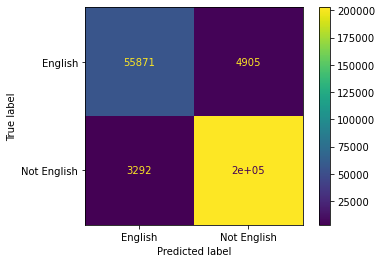

In [27]:
ConfusionMatrixDisplay.from_predictions(
    true,
    pred,
    display_labels=["English", "Not English"]
)

I define a function that returns the percentage of tokens that are contained in my reference dictionary (dictionary of tokens, in this case I use Snowball).  
The #'s are for debugging and see how much time is left to finish the computing.


In [28]:
def my_fun(diz, text):
    count = 0
    mancante = 0
    lunghezza = len(text)
    #print(lunghezza)
    #aux = 0
    for i in text:
        #aux +=1
        #if(aux%(int(lunghezza/10))==0):
            #mancante+=1
            #print(mancante*10)
        if i in diz:
            count+=1

    perc_bow = count/lunghezza
    print(perc_bow)

I save the reference dictionary.

In [29]:
filename = 'C:\\Users\\39331\\Desktop\\UNIVR\\Natural Language\\progetto\\english bow.txt'
data = np.loadtxt(filename, delimiter=',', skiprows=1, dtype=str)
#print(data)

I launch my function. As we can see, normally, if the text is english, the percentage is over the $\sim$85%.
If it's written in another language, it will give us under $\sim$15%.

In [30]:
my_fun(data,Plemmatized_wordsING)

0.9013704933118611


In [31]:
my_fun(data,Plemmatized_wordsDUTCH)

0.08952543592963862


### SENTECES BASED CLASSIFIER

I already have the 4 texts of the 4 languages.
I tokenize them by sentences using the nltk's function.

In [32]:
testo_sentING = sent_tokenize(testoING)
testo_sentITA = sent_tokenize(testoITA)
testo_sentDUTCH = sent_tokenize(testoDUTCH)
testo_sentFINNISH = sent_tokenize(testoFINNISH)

keeping the senteces structure, I tokenize every words inside of senteces.

In [33]:
testo_wordING = [word_tokenize(s) for s in testo_sentING]
testo_wordITA = [word_tokenize(s) for s in testo_sentITA]
testo_wordDUTCH = [word_tokenize(s) for s in testo_sentDUTCH]
testo_wordFINNISH = [word_tokenize(s) for s in testo_sentFINNISH]

Now, i'm gonna do the same process saw before with the word classfier but keeping the senteces structure under the form of array of senteces, where the senteces are array of tokens.

In [34]:
filtered_ING = [[word for word in s if word.casefold() not in ST] for s in testo_wordING]
filtered_listING = [[ word for word in s if word.isalpha()]for s in filtered_ING]

filtered_ITA = [[word for word in s if word.casefold() not in ST_ita] for s in testo_wordITA]
filtered_listITA = [[ word for word in s if word.isalpha()]for s in filtered_ITA]

filtered_DUTCH = [[word for word in s if word.casefold() not in ST_dutch] for s in testo_wordDUTCH]
filtered_listDUTCH = [[ word for word in s if word.isalpha()]for s in filtered_DUTCH]

filtered_FINNISH = [[word for word in s if word.casefold() not in ST_finnish] for s in testo_wordFINNISH]
filtered_listFINNISH = [[ word for word in s if word.isalpha()]for s in filtered_FINNISH]

This time for the stemming, I can do different stemming one for each language due to the SnowBall Stemming repository.

In [35]:
stemmed_wordsING=SnowballStemmer('english')
stemmed_wordsITA=SnowballStemmer('italian')
stemmed_wordsDUTCH=SnowballStemmer('dutch')
stemmed_wordsFINNISH=SnowballStemmer('finnish')

Same lemmatization as seen before, but also here keeping the structure of the arrays of senteces.

In [36]:
lemmatized_wordsING = WordNetLemmatizer()
lemmatized_wordsITA = WordNetLemmatizer()
lemmatized_wordsDUTCH = WordNetLemmatizer()
lemmatized_wordsFINNISH = WordNetLemmatizer()

In [37]:
array_sent_tokensING = [
        [
            lemmatized_wordsING.lemmatize(stemmed_wordsING.stem(word))
            for word in s 
        ]
        for s in filtered_listING
    ]

array_sent_tokensITA = [
        [
            lemmatized_wordsITA.lemmatize(stemmed_wordsITA.stem(word))
            for word in s 
        ]
        for s in filtered_listITA
    ]

array_sent_tokensDUTCH = [
        [
            lemmatized_wordsDUTCH.lemmatize(stemmed_wordsDUTCH.stem(word))
            for word in s 
        ]
        for s in filtered_listDUTCH
    ]

array_sent_tokensFINNISH= [
        [
            lemmatized_wordsFINNISH.lemmatize(stemmed_wordsFINNISH.stem(word))
            for word in s 
        ]
        for s in filtered_listFINNISH
    ]


I merge the not-english arrays of senteces together.

In [38]:
array_sent_non_eng = array_sent_tokensITA + array_sent_tokensDUTCH + array_sent_tokensFINNISH

I merge the not-english arrays of tokens together.

In [39]:
english = Plemmatized_wordsING
not_english = Plemmatized_wordsITA + Plemmatized_wordsDUTCH + Plemmatized_wordsFINNISH

I create the frequency distribution's array for all the 4 languages together.

In [40]:
frequency_distribution = FreqDist(Plemmatized_wordsING)+FreqDist(Plemmatized_wordsITA)+FreqDist(Plemmatized_wordsDUTCH)+FreqDist(Plemmatized_wordsFINNISH)

I save only the most N common words in an array.

In [41]:
N = 1000
most_common = list(frequency_distribution)[:N]

I define a function that return true/false if inside a sentece there is a common word that is inside my most_common array.

In [42]:
def occurrences(sentence):
    return {f'contains({word})': (word in set(sentence)) for word in most_common}

I define:  
**label_one**: an array lenght as the senteces array, full of  "1", meaning the language is english.  
**occurrences_eng**: an array created by using the function "occurences" on every senteces of the array. The result will be an array as long as the number of senteces and for every senteces I have an array of True/False long N where I can find if in there there were any common word.  
**english_dataset**: I "zip" occurrences_eng with label_one and I cast it to a list.

In [43]:
label_one = [1] * len(array_sent_tokensING)
occurrences_eng = [occurrences(p) for p in array_sent_tokensING]
english_dataset= list(zip(occurrences_eng, label_one))

Same as before, but this time the labels are "0" because they aren't english.

In [44]:
label_zero = [0] * len(not_english)
occurrences_not_eng = [occurrences(p) for p in array_sent_non_eng]
not_english_dataset= list(zip(occurrences_not_eng, label_zero))

I merge the two datasets.

In [45]:
dataset=english_dataset+not_english_dataset

I shuffle it.

In [46]:
random.shuffle(dataset)

Split train-test like before.

In [47]:
X_train, X_test = train_test_split(dataset,
                                   random_state=104, 
                                   test_size=0.25, 
                                   shuffle=True)

I train the classifier.

In [48]:
classifier = nltk.NaiveBayesClassifier.train(X_train) 

I compute the classifier predictions and the groundtruth.

In [49]:
y_pred = [classifier.classify(f) for (f, label) in X_test]
y_true = [label for (f, label) in X_test]

I compute, as seen before, the various metrics.

In [50]:
print(f"ACCURACY: {ACC(y_true, y_pred)}")
print(f"PRECISION: {PR(y_true, y_pred)}")
print(f"RECALL: {RC(y_true, y_pred)}")
print(f"F1: {F1(y_true, y_pred)}")

ACCURACY: 0.9900439375525848
PRECISION: 0.9976905311778291
RECALL: 0.9592248687928946
F1: 0.9780796542142637


Accuracy by nltk.

In [51]:
print('ACCURACY BY NLTK: {:4.3f}'.format(nltk.classify.accuracy(classifier, X_test))) 

ACCURACY BY NLTK: 0.990


I compute and display the Confusion Matrix.

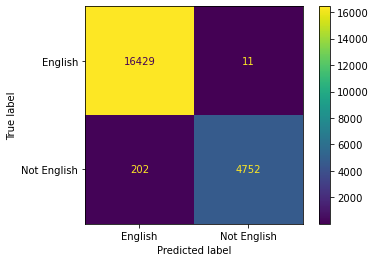

In [52]:
ConfusionMatrixDisplay.from_predictions(
    y_true,
    y_pred,
    display_labels=["English", "Not English"]
)

### ANSWER TO THE ASSIGNMENT

1. "Size of the corpus, size of the split training and test sets"  
    I select 4 corpora: english, italian, dutch and finnish.  
    The classifier analizes in the first half part tokens and in the second part sentences:
    - in the fist part I have 243416 english tokens and 823843 not english tokens.  
    - in the second part I have 20095 english sentences and 65480 not english sentences.
    I I splitted my dataset in 75% train and 25% test  
    
2. "Performance indicators employed and their nature"   
    All the metrics return astonishing results, particularly the results obtain in the second part, where i classify by using the most common words inside the senteces.    
    
3. "Employability of the classifier as a Probabilistic Language Model"  
The classifier return reliable result. During training phase it learns the most common words belong to each class. The results are optimal in both cases, in the senteces case are a little better. The Naive Bayes Classifier is now able to classify:   
    1. In the word classify what is the probability of a single token belongs to an 'ENGLISH' or a 'NON ENGLISH' class.
    2. In the senteces classify what is the probability that a sentence belongs to an 'ENGLISH' or a 'NON ENGLISH' class.